# MLP Regression
## Module import

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

## Initial window size selection

In [9]:
# Set the directory containing the CSV files
input_directory = '../../1-preprocessing/data/6-time-lags/USD'

# Create DataFrames to store the results
mse_results = pd.DataFrame(columns=['Offset', 'MSE'])
r2_results = pd.DataFrame(columns=['Offset', 'R2'])

# Loop through the files in the directory
for filename in os.listdir(input_directory):
    #if filename == '10.csv':
        if filename.endswith('.csv'):
            # Extract the offset from the filename
            offset = int(filename.split('.')[0])
    
            # Load the data from the CSV file
            data = pd.read_csv(os.path.join(input_directory, filename))
    
            # Split the data into features and target
            X = data.iloc[:, 1:-1]
            y = data.iloc[:, -1]
    
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(
                X,
                y,
                test_size=0.1,
                random_state=42
            )
            
            # Fit the MLPRegressor model
            model = MLPRegressor(
                hidden_layer_sizes=(100,),
                activation='relu',
                solver='adam',
                random_state=0
            )
            model.fit(X_train, y_train)
    
            # Calculate the Mean Squared Error (MSE) on the training set
            y_train_pred = model.predict(X_train)
            mse = mean_squared_error(y_train, y_train_pred)
    
            # Calculate the R-squared score on the test set
            y_test_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_test_pred)
    
            # Add the results to the DataFrames
            mse_results = pd.concat([mse_results, pd.DataFrame({'Offset': [offset], 'MSE': [mse]})])
            r2_results = pd.concat([r2_results, pd.DataFrame({'Offset': [offset], 'R2': [r2]})])


## Plot mse and r2 results

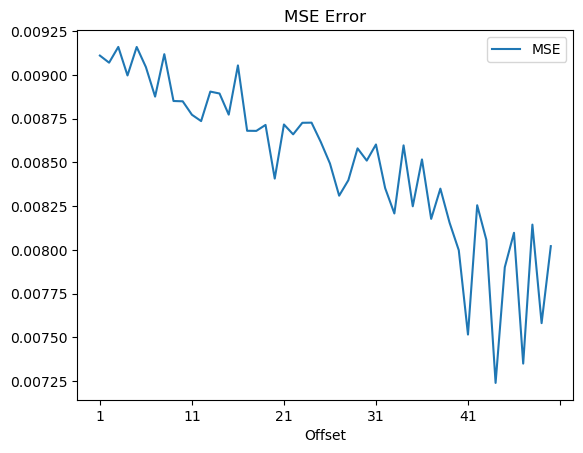

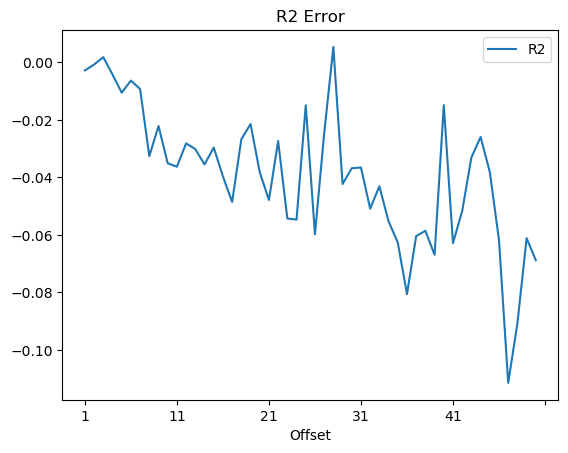

In [10]:
sorted_mse = mse_results.sort_values(by='Offset')
sorted_mse.plot(title='MSE Error', x='Offset')

sorted_r2 = r2_results.sort_values(by='Offset')
sorted_r2.plot(title='R2 Error', x='Offset', y='R2')

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Set the directory containing the CSV files
input_directory = '../../1-preprocessing/data/6-time-lags/USD'

# Create a DataFrame to store the results
r2_results = pd.DataFrame(columns=['Offset', 'R2'])

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50), (100), (200)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Loop through the files in the directory
for filename in os.listdir(input_directory):
    if filename == '44.csv':
        if filename.endswith('.csv'):
            # Extract the offset from the filename
            offset = int(filename.split('.')[0])
    
            # Load the data from the CSV file
            data = pd.read_csv(os.path.join(input_directory, filename))
    
            # Split the data into features and target
            X = data.iloc[:, 1:-1]
            y = data.iloc[:, -1]
            date = data.iloc[:, 0]
            
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(
                X,
                y,
                shuffle=False,
                test_size=0.1,
                random_state=42
            )

            # Initialize the MLPRegressor model
            model = MLPRegressor(random_state=0)

            # Perform grid search
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=param_grid,
                cv=5,             # 5-fold cross-validation
                scoring='r2',     # evaluation metric
                n_jobs=-1         # use all available CPU cores
            )
            
            # Fit the model
            grid_search.fit(X_train, y_train)

            # Get the best model
            best_model = grid_search.best_estimator_

            # Evaluate the best model on the test set
            y_pred = best_model.predict(X_test)
            r2 = r2_score(y_test, y_pred)

            # Calculate the Directional Symmetry (hit rate)
            hit_rate = (np.sign(y_pred) == np.sign(y_test)).mean()

            # Print the results
            print(f"Offset: {offset}")
            print(f"Best parameters: {grid_search.best_params_}")
            print(f"Best R^2 score: {grid_search.best_score_:.3f}")
            print(f"Directional Symmetry (hit rate): {hit_rate:.2f}")


Offset: 44
Best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 50, 'solver': 'adam'}
Best R^2 score: -0.013
Directional Symmetry (hit rate): 0.92


## Save results to a CSV file

In [11]:
sorted_mse.to_csv('mse_error_results.csv', index=False)
sorted_r2.to_csv('r2_results.csv', index=False)

## Plot test set and prediction set

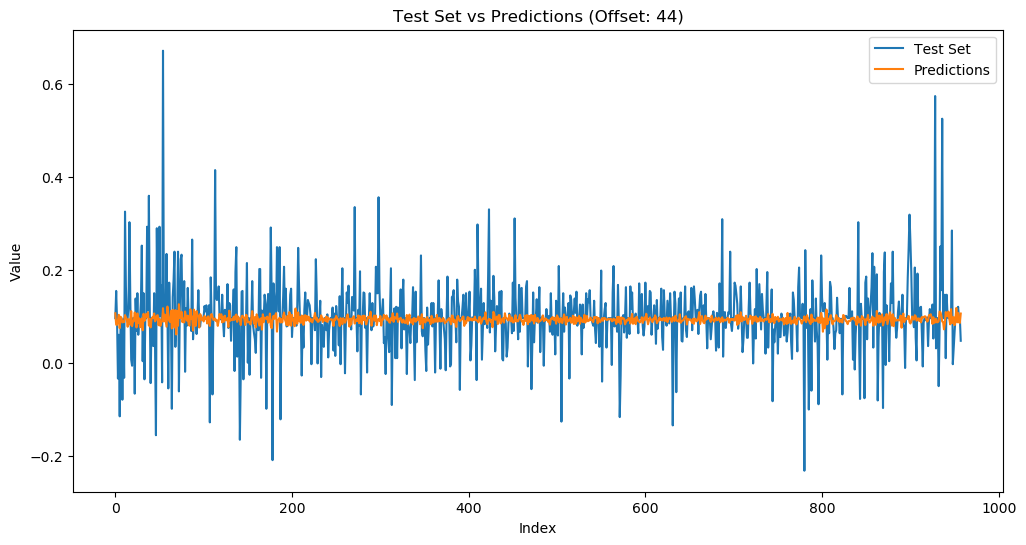

In [21]:
# Plot the test set and the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Test Set')
plt.plot(y_pred, label='Predictions')
plt.title(f'Test Set vs Predictions (Offset: {offset})')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()